In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os
import pandas as pd
import matplotlib
#matplotlib.use('Agg')
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from msmbuilder.io import (gather_metadata, save_meta, NumberedRunsParser, load_meta, render_meta, preload_tops, 
                           save_trajs, save_generic,load_trajs, backup, load_generic, preload_top)
import mdtraj as md
from msmbuilder.dataset import dataset
import itertools
import statistics


## Note

The tricky thing is making the "distance pairs". Nedd to find a way to compare by residue and not by atom. 
At least in the way I write the code. 

Also, we may want to change the function we are using to:

https://mdtraj.org/1.9.4/api/generated/mdtraj.compute_contacts.html

Also notice!! this will find all the possible atom pairs and give you their minimum distance. It does not have any threshold! or filter!! so you we are actually calculating distances even for atoms that are very far away! 


## Define functions

In [3]:
def plot_mindist_pairs(item, mutsys, atom1, atom2):#xyz, dist_pairs, out_res, mutant,outdir):
    left, width = 0.1, 0.65
    bottom, height = 0.1, 0.65
    bottom_h = left_h = left + width + 0.03
    rect_scatter = [left, bottom, width, height]
    rect_histy = [left_h, bottom, 0.2, height]
    plt.figure(1, figsize=(16, 8))
    axRMSD = plt.axes(rect_scatter)
    axRMSD.set_ylim([0, 2])
    axHisty = plt.axes(rect_histy)
    axHisty.set_ylim([0, 2])
    timestep=0.1
    axRMSD.set_xlabel('Frame #')
    axRMSD.set_ylabel('Distance (nm)')
    axRMSD.set_title("%s_%s_%s" % (mutsys, atom1, atom2 ))
    axHisty.set_xlabel('P')
    axRMSD.plot(mindist[0][:,item], alpha=0.5)
    axRMSD.axhline(y=0.8, color='r', linestyle='-.')
    axRMSD.axhline(y=0.4, color='r', linestyle='-.')
    axHisty.hist(mindist[0][:,item], bins=50, orientation='horizontal', alpha=0.5)
    plt.axhline(y=0.8, color='r', linestyle='-')
    plt.axhline(y=0.4, color='r', linestyle='-')
    #rmsds_array.append(rmsd)
    plt.savefig(outdir+mutsys+'_'+atom1+'_'+atom2+'.png')
    plt.show()

In [4]:
def plot_mindist2_pairs(item, mutsys, atom1, atom2):#xyz, dist_pairs, out_res, mutant,outdir):
    left, width = 0.1, 0.65
    bottom, height = 0.1, 0.65
    bottom_h = left_h = left + width + 0.03
    rect_scatter = [left, bottom, width, height]
    rect_histy = [left_h, bottom, 0.2, height]
    plt.figure(1, figsize=(16, 8))
    axRMSD = plt.axes(rect_scatter)
    axRMSD.set_ylim([0, 2])
    axHisty = plt.axes(rect_histy)
    axHisty.set_ylim([0, 2])
    timestep=0.1
    axRMSD.set_xlabel('Frame #')
    axRMSD.set_ylabel('Distance (nm)')
    axRMSD.set_title("%s_%s_%s" % (mutsys, atom1, atom2 ))
    axHisty.set_xlabel('P')
    #axRMSD.plot(mindist2[0][:,item], alpha=0.5)
    axRMSD.plot(mindist2[:,0], alpha=0.5)
    #axRMSD.axhline(y=0.8, color='r', linestyle='-.')
    axRMSD.axhline(y=0.4, color='r', linestyle='-.')
    axHisty.hist(mindist2[:,0], bins=50, orientation='horizontal', alpha=0.5)
    #plt.axhline(y=0.8, color='r', linestyle='-')
    plt.axhline(y=0.4, color='r', linestyle='-')
    #rmsds_array.append(rmsd)
    plt.savefig(outdir+mutsys+'_'+atom1+'_'+atom2+'.png')
    plt.show()

In [5]:
def barlikeplot_mindist2_pairs(mutsys, atom1, atom2):#xyz, dist_pairs, out_res, mutant,outdir):
    
    plt.figure(figsize=(12, 1.5))  # Optional: Set the figure size according to your preferences

    # Define the colors for bars based on the condition
    
    # SER 16 COLOR:
    #colors = ['deepskyblue' if value < 0.4 else 'white' for value in mindist2[:,0]]
    
    # X17 COLOR:
    colors = ['black' if value < 0.4 else 'white' for value in mindist2[:,0]]
    
    # SER 18 COLOR:
    #colors = ['darkorange' if value < 0.4 else 'white' for value in mindist2[:,0]]
    

    # Create the bar plot with colored bars
    plt.bar(range(len(mindist2[:,0])), mindist2[:,0], color=colors)

    plt.ylim([0, 0.1])

    # Optional: Customize the plot appearance
    plt.xlabel('Time')
    #plt.ylabel(atom2, weight='bold', fontsize=14, rotation='horizontal', labelpad=50)
    #plt.xticks(range(len(mindist2[:,0])))  # Optional: Show ticks for each time point
    plt.grid(axis='x')  # Optional: Add a grid to the plot
    plt.yticks([])

    
    #plt.title("%s_%s_%s" % (mutsys, atom1, atom2 ))
    plt.savefig(outdir+mutsys+'_'+atom1+'_'+atom2+'_bar.pdf', bbox_inches='tight')
    
    plt.tight_layout()
    
    plt.show()
    
    

In [6]:
def barlikeplot_mindist3_pairs(mutsys, atom1, atom2):#xyz, dist_pairs, out_res, mutant,outdir):
    
    plt.figure(figsize=(12, 0.75))  # Optional: Set the figure size according to your preferences

    # Define the colors for bars based on the condition
    
    # SER 16 COLOR:
    #colors = ['deepskyblue' if value < 0.4 else 'white' for value in mindist2[:,0]]
    
    # X17 COLOR:
    colors = ['black' if value < 0.4 else 'white' for value in mindist2[:,0]]
    
    # SER 18 COLOR:
    #colors = ['darkorange' if value < 0.4 else 'white' for value in mindist2[:,0]]
    

    # Create the bar plot with colored bars
    plt.bar(range(len(mindist2[:,0])), mindist2[:,0], color=colors)

    plt.ylim([0, 0.1])

    # Optional: Customize the plot appearance
    #plt.xlabel('Time')
    #plt.ylabel(atom2, weight='bold', fontsize=14, rotation='horizontal', labelpad=50)
    #plt.xticks(range(len(mindist2[:,0])))  # Optional: Show ticks for each time point
    plt.grid(axis='x')  # Optional: Add a grid to the plot
    plt.yticks([])
    
    x = [0,500,1000,1500,2000,2500]
    xtick_labels = ['T1', 'T2', 'T3', 'T4', 'T5','']
    
    plt.xticks(x, xtick_labels, fontsize=16)
    
    TitleLabels={'K13':'$\mathbf{K^{-12}}$', 'LYS17-NZ':'$\mathbf{K^{-12}(NZ)}$', 'LYS17-N':'$\mathbf{K^{-12}(N)}$',
                'LYS17-O':'$\mathbf{K^{-12}(O)}$','ASN17-OD1':'$\mathbf{N^{-12}(OD1)}$','ASN17-ND2':'$\mathbf{N^{-12}(ND2)}$',
                'ASN17-N':'$\mathbf{N^{-12}(N)}$','GLY17-N':'$\mathbf{G^{-12}(N)}$','GLY17-O':'$\mathbf{G^{-12}(O)}$',
                'GLY17-CA':'$\mathbf{G^{-12}(CA)}$'}
    
    #plt.title("%s_%s_%s" % (mutsys, atom1, atom2 ))
    
    #plt.title(F'{TitleLabels[mutsys]} - {TitleLabels[atom1]}-{atom2}', weight='bold', fontsize=24)
    
    plt.title(F'{TitleLabels[atom1]} - {atom2}', weight='bold', fontsize=24)
    
    plt.savefig(outdir+mutsys+'_'+atom1+'_'+atom2+'_bar.png', bbox_inches='tight', dpi=300)
    
    plt.tight_layout()
    
    plt.show()

##########    
# NOTES:
# What do I want? 
# Add atom labels automatically
# Make the plots thinner 
# Chang the labels of time... instead just write traj1, traj2, ... 
# make sure the size is consistent... separate bar size and name size
    
    

## Load Data

In [7]:
# Define system and paths

mutsys="WT"

topology_file="/Users/fatima/Stanford/70S/Trajectories/%s/Within15CompleteTunnel/em_within15_tunnel.pdb" % mutsys
md_root="/Users/fatima/Stanford/70S/Trajectories/%s/Within15CompleteTunnel/rename_trajs/cattrajs/run_all.xtc" % mutsys
md_trajs=[md_root+"run0.xtc",md_root+"run1.xtc", md_root+"run2.xtc",md_root+"run3.xtc", md_root+"run4.xtc" ]

data_subsampling_stride=1
timestep=0.1 #ns

outdir="/Users/fatima/Stanford/70S/CombinedAnalysis/20MAR2024_DISTANCES_FORFIGURE_REPEAT/" 
out_csv=outdir+"%s.csv" % mutsys

In [8]:
if not os.path.isdir(outdir):
    print ("Generating out dir", outdir)
    os.mkdir(outdir)

In [9]:
# Load topology and trajectories 

xyz = md.load(md_root, top=topology_file)
topology=md.load(topology_file).topology

In [10]:
# Figure out what is the 'new' residue number in this topology

#for i in range(335):
#    print(str(i)+" "+str(topology.residue(i)))

## These are the initial and final residues for the nascent peptide, uL22 and uL4 chains: 

### Nascent peptide

ACE2 : 232
SER28 : 258

### uL4

i_i : 176
i_f : 193

### uL22

v_i : 199
v_f : 220

### uL23

w_i : 222
w_f : 231

### Interesting residues?

G13 : 243
G19 : 249
A751:46 

### Nascent Peptide section

S16 : 246
X17 : 247
S18 : 248

## Considerations when calculating distance

We could do an "all vs all" approach, however very quickly this becomes difficult to understand. 
For that reason, we decided to focus here on just the contacts between the mutated residue (and adjacent residues), and all others (it is ok because our "small system" contains only 334 residues). 

I am using mdtraj's compute_contacts function. One of the inputs is the residue pairs. The cell below creates the pairs we want. Notice that the residue number was obtained from the 'code' cell above. 

In [11]:

# #Create all the atom pairs between chains we care about

group_1=[]
group_2=[]

# #Note: remember to add +1 to the second number in range, so all the indeces you want are included.

group_1.append(247)

for i in range(0,335):
    group_2.append(i)


pairs = list(itertools.product(group_1, group_2))


In [12]:
# it's nice to check that you get what you wanted!
#print(pairs)

In [13]:
#Calculate minimum distance between atom pairs 
#Compute_contacts has multiple scheme: 
#closest-heavy: minimum distance between any two non-H atoms
#sidechain-heavy: minimum distances between any two non-H atoms that are part of a sidechain 
#               (how does it work for nucleic acids? <- it doesn't ~)

mindist=md.compute_contacts(xyz, pairs, scheme='closest-heavy', ignore_nonprotein=False)

In [14]:
#Here we calculate the % of frames where distances are below 0.4 nm 
#When more than 50% of frames have contact, we print contact ID, atoms involved in contact
#and the total % of frames containing contact. 
#The output is written in the format of a markdown table.


# counter_i=0
# contact_id=[]

# with open(out_csv, 'w') as f:
#             f.write("ID contact, atom 1, atom2, Fraction present \n")

# print("|ID contact | atom 1 | atom 2 | Fraction present |")
# print("|:----:|:-----:|:------:|:--:|")
        
# for i in range(len(mindist[1])):
#     counter_p=0
#     for j in range(len(mindist[0][:,i])):
#         if mindist[0][:,i][j] <= 0.4:
#             counter_p +=1
#     if counter_p/(len(mindist[0][:,334])) >= 0.05 :
#         print('|'+ str(counter_i)+'|'+str(topology.residue(mindist[1][i][0]))+
#               '|'+str(topology.residue(mindist[1][i][1]))+'|'+
#               "{:.2f}".format(counter_p/(len(mindist[0][:,334])))+'|')
#         with open(out_csv, 'a') as f:
#             f.write(str(counter_i)+','+str(topology.residue(mindist[1][i][0]))+
#               ','+str(topology.residue(mindist[1][i][1]))+','+
#               "{:.2f}".format(counter_p/(len(mindist[0][:,334])))+'\n')       
#         contact_id.append(counter_i)

#     counter_i+=1 



In [15]:
# Populate a dataframe with the topology info

table, bonds = topology.to_dataframe()

In [16]:
# What are the names of the atoms of the residue of interest? 

# mutsite = table.loc[table['resName'] == 'GLY']
# mutsite = mutsite.loc[mutsite['resSeq'] == 17]
# print(mutsite)

In [25]:
# Select sidechain atom 
# We want to get the index of the atom we desire
# We need to substract 1 to the 'serial' value 

mutsite = table.loc[table['resName'] == 'GLY']
mutsite = mutsite.loc[mutsite['resSeq'] == 17]
mutsite = mutsite.loc[mutsite['name'] == 'CA']
print(mutsite['serial']-1)

6659    6659
Name: serial, dtype: int64


In [26]:
#contacts MARCH 2024

# K17_NZ 
# plotres=['A','U','U','A','A']
# plotresnum=[789,790,1781, 751, 752]
# atom_name=["A789-O3'","U790-O4","U790-OP1","U1781-O2","U1781-O4","A752-OP2","A751-O3'"]

# K17_N 

# plotres=['LYS','A']
# plotresnum=[90, 751]
# atom_name=["LYS90-O","A751-C2"]

# K17 O

# plotres=['LYS','ARG']
# plotresnum=[90, 92]
# atom_name=["LYS90-NZ","ARG92-NH1"]

# N17 ND2

# plotres=['LYS','ARG','A','A']
# plotresnum=[90,92,751,2059]
# atom_name=["LYS90-O","ARG92-CG","A751-O2'","A2059-OP1"]

# N17 N

# plotres=['GLY','A']
# plotresnum=[91,751]
# atom_name=["GLY91-O","A751-N3"]

# # N17 OD1

# plotres=['ARG','A','A']
# plotresnum=[92,751,2058]
# atom_name=["ARG92-NH1","A751-N3","A2058-O3'"]

# CONTROL N

# plotres=['GLY','LYS','GLY','A']
# plotresnum=[91,90,64,751]
# atom_name=["GLY91-O","LYS90-O","GLY64-O","A751-C2"]

# CONTROL CA

# plotres=['LYS','A']
# plotresnum=[90,751]
# atom_name=["LYS90-O","A751-C2"]

# # CONTROL O

# plotres=['GLY','ARG','U']
# plotresnum=[64,92,747]
# atom_name=["GLY64-O","ARG92-NH2","U747-O4"]

# WT N

# plotres=['GLY','LYS','ARG','A','U']
# plotresnum=[91,90,92,751,790]
# atom_name=["GLY91-O","LYS90-O","ARG92-CD","A751-C2","U790-OP1"]

# WT O

# plotres=['LYS','ARG','ARG']
# plotresnum=[90,92,67]
# atom_name=["LYS90-CB","ARG92-NH2","ARG67-NH2"]

# WT CA

plotres=['A','U']
plotresnum=[751,790]
atom_name=["A751-N6","U790-OP1"]



In [27]:
# for i in range(len(plotres)):
    
    
#     result = table.loc[table['resName'] == plotres[i]]
#     result = result.loc[result['resSeq'] == plotresnum[i]]
#     #result = result.loc[result['name'] == atomtype[i]]
#     result = result.loc[result['element'] != 'H']
    
#     print(result)
    
#     pairs=[]
    
#     for item in result['serial']:
#         print(item)
#         pair=(int(mutsite['serial']-1),item-1)
#         pairs.append(pair)
    
#     print(pairs)
    
#     mindist2=md.compute_distances(xyz, pairs)
    
#     print(mindist2[:,0])
    
#     for atomnum in result['serial']:
#         print(atomnum+1)
#         barlikeplot_mindist2_pairs(mutsys, str(topology.atom(int(mutsite['serial']-1))), str(topology.atom(atomnum-1)))

    


/Users/fatima/anaconda3/envs/MyMSMve/lib/python3.6/site-packages/ipykernel_launcher.py:47: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 


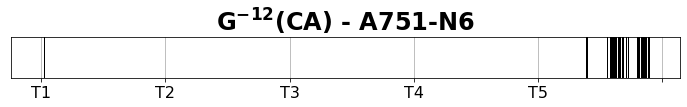

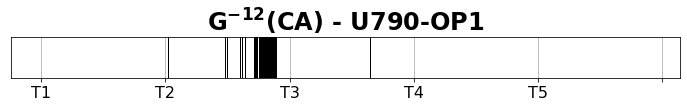

In [28]:
for i in range(len(plotres)):
    
    
    result = table.loc[table['resName'] == plotres[i]]
    result = result.loc[result['resSeq'] == plotresnum[i]]
    #result = result.loc[result['name'] == atomtype[i]]
    result = result.loc[result['element'] != 'H']
    
    #print(result)
    
    
    
    for item in result['serial']:
        pairs=[]
        #print(item)
        pair=(int(mutsite['serial']-1),item-1)
        pairs.append(pair)
    
        #print(pairs)
    
        mindist2=md.compute_distances(xyz, pairs)
    
        #print(mindist2[:,0])
        
        #print(str(topology.atom(item-1)))
        
        if str(topology.atom(item-1)) in atom_name:
            barlikeplot_mindist3_pairs(mutsys, str(topology.atom(int(mutsite['serial']-1))), str(topology.atom(item-1)))

    
